In [3]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import pandas as pd
from scipy.optimize import curve_fit
from scipy import signal #detrend
from scipy.fftpack import fft, fftfreq, ifft
from scipy.signal import find_peaks

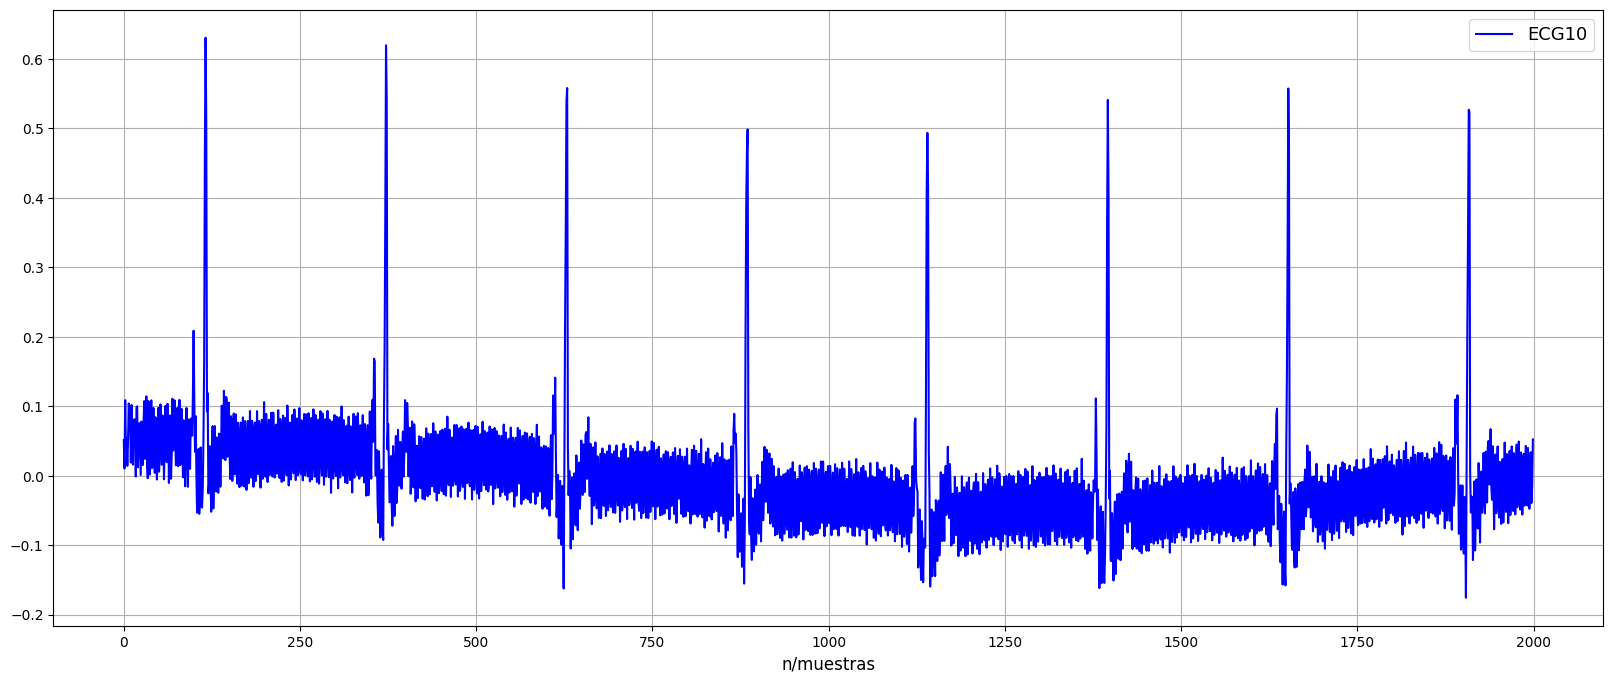

In [4]:
ecg10 = np.loadtxt ("/Users/paulaaguirrecarol/Desktop/PDSB 1/ECG10.txt")
N = len(ecg10) ; n1 = np.arange (N)

plt.figure(figsize=(20,8)) 
plt.plot(n1, ecg10,label='ECG10',color="b")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

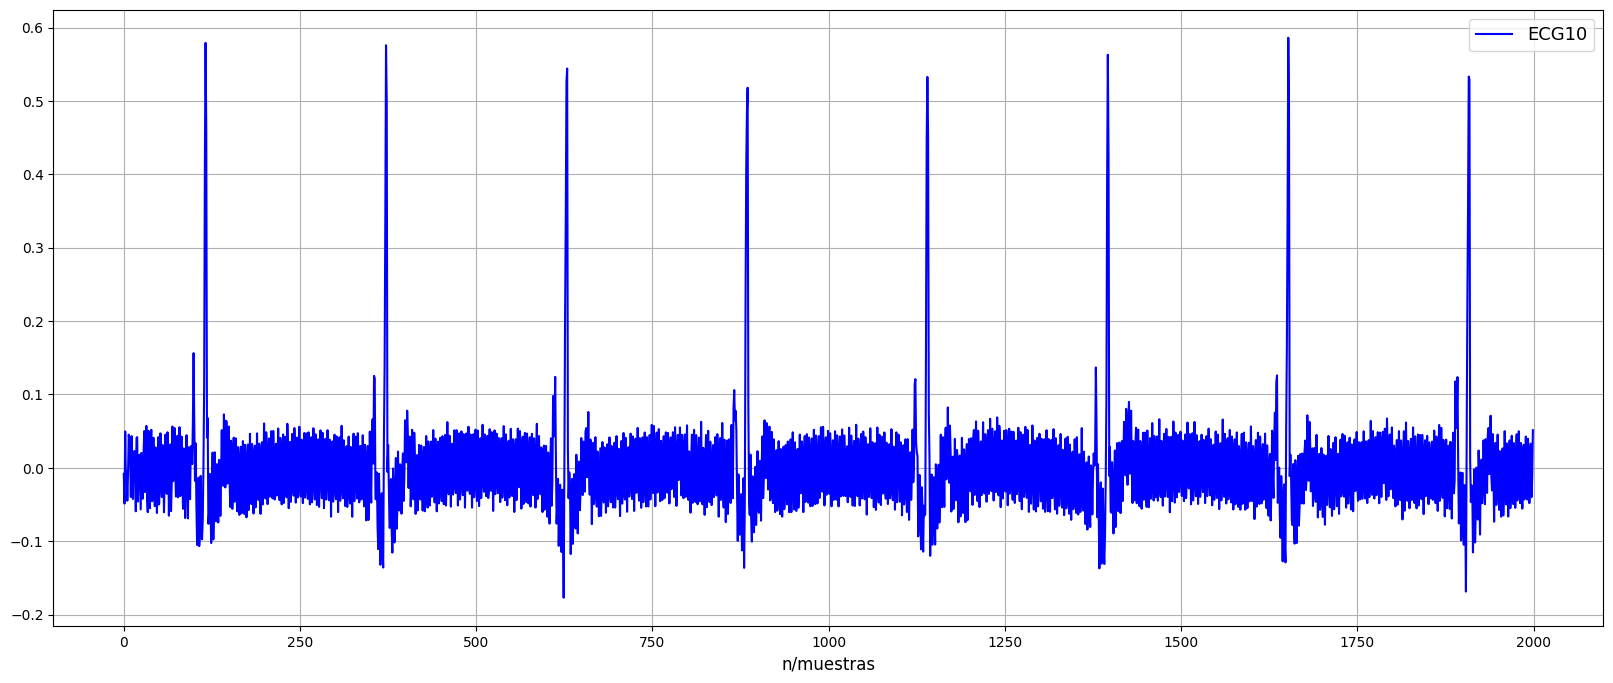

In [6]:
A = np.arange (0,N,200) ; B = tuple (A)
y10 = signal.detrend (ecg10,bp=A) #elimino tendencia

plt.figure(figsize=(20,8))
plt.plot(n1, y10,label='ECG10',color="b")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

In [7]:
M = np.arange (1,11) #vector de ordenes de los FPM
k = np.arange (0,20,dtype=np.float64)
resp = np.empty ((N,len(M)))
for i,N1 in enumerate (M):
    FPM = np.piecewise (k,(0<=k)&(k<=N1-1),[1/N1,0])
    resp[:,i] = np.convolve (y10,FPM,"same")

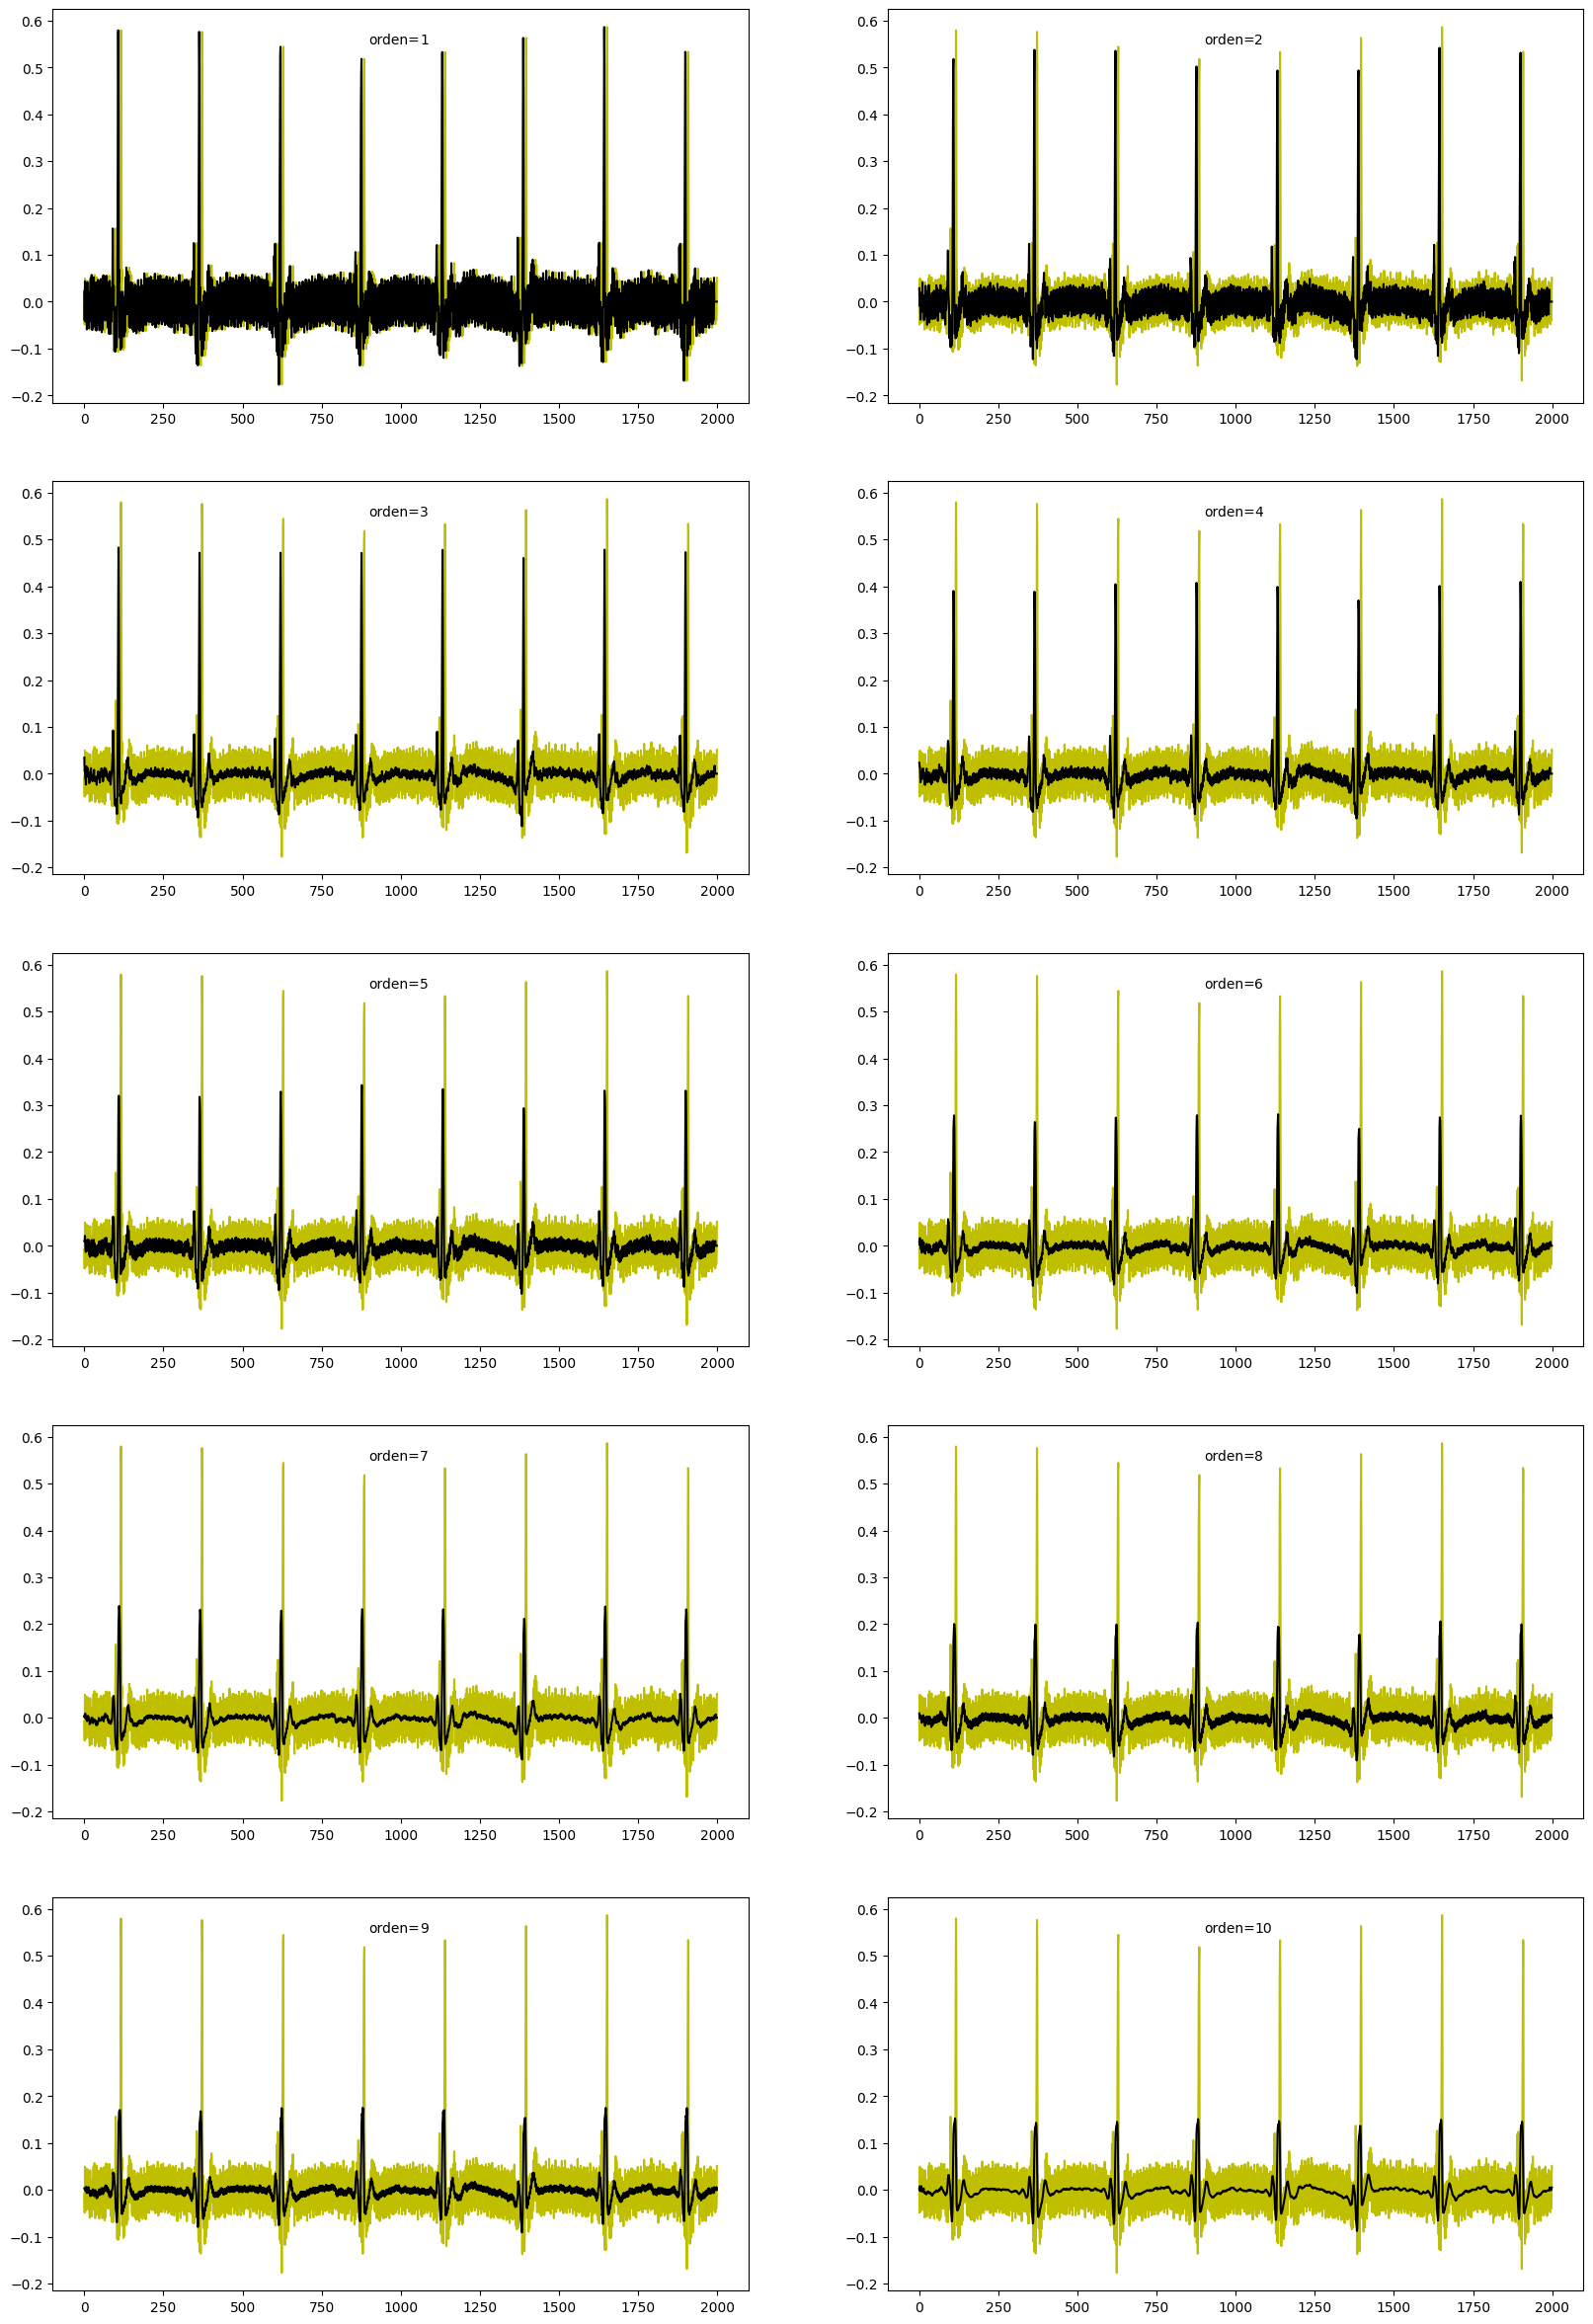

In [8]:
plt.figure(figsize=(20,30))
for i,j in enumerate (M):
    plt.subplot (5,2,j)
    plt.plot(n1, y10,color="y")
    plt.plot(n1, resp[:,i],color="k")
    plt.text (900,0.55,s="orden=")
    plt.text (1060,0.55,s=j)
plt.show()

In [9]:
peaks_max = find_peaks (y10,distance=150)[0]
peaks_max

array([ 116,  372,  629,  885, 1140, 1396, 1652, 1908])

In [10]:
peaks_min = find_peaks (-y10,distance=150)[0]
peaks_min

array([ 107,  368,  624,  880, 1144, 1384, 1648, 1904])

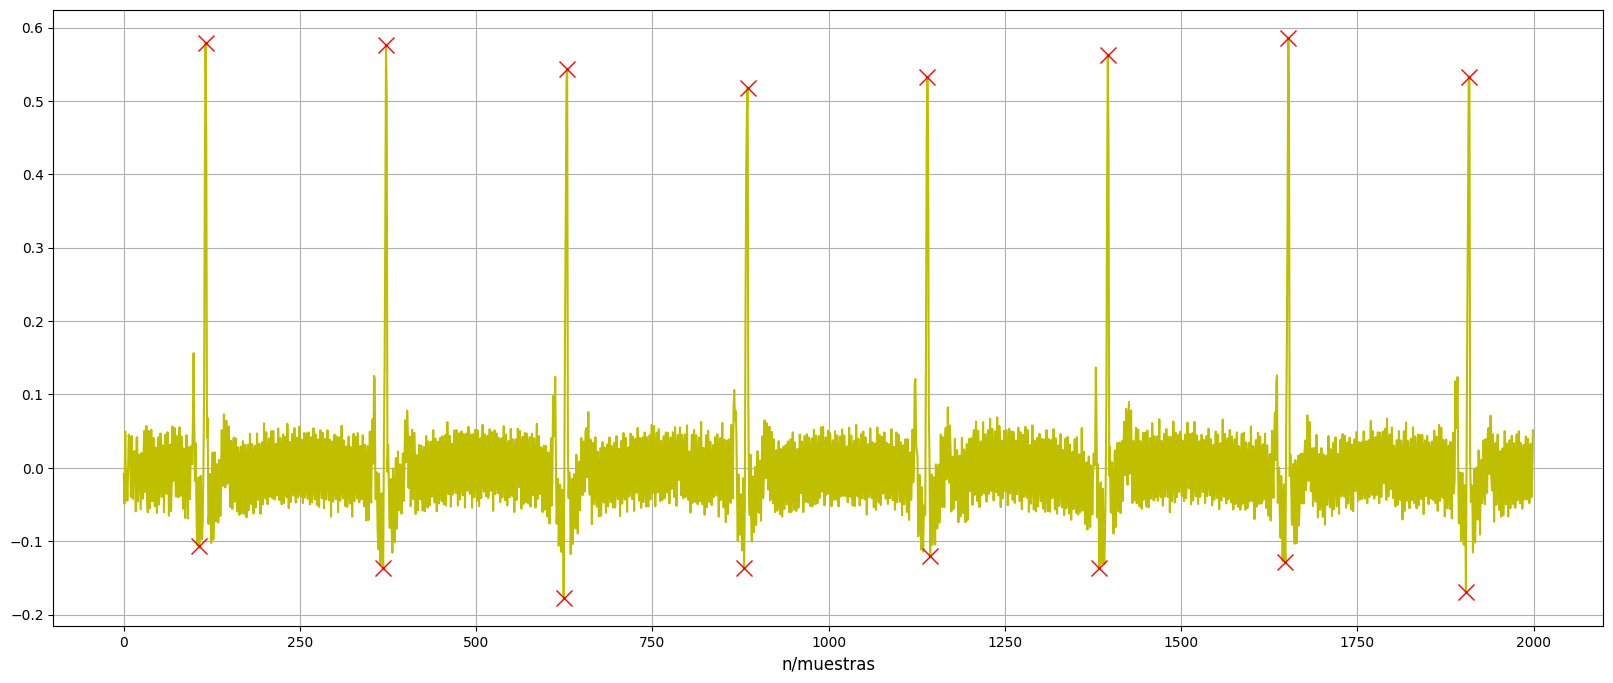

In [11]:
plt.figure(figsize=(20,8))
plt.plot(n1, y10,label='y10',color="y")
plt.plot(peaks_max, y10[peaks_max],"x",color="r",ms=12)
plt.plot(peaks_min, y10[peaks_min],"x",color="r",ms=12)
plt.xlabel('n/muestras',fontsize=12)
plt.grid(True)
plt.show()

In [12]:
preaks_mas = find_peaks (y10,distance=150)[0] ; peaks_min = find_peaks (-y10,distance=150)[0]
A_max_signal = np.mean (y10[peaks_max]) ; A_min_signal = np.mean (y10[peaks_min])
aux_max = np.zeros ((len(M),len(peaks_max))) ; aux_min = np.zeros ((len(M),len(peaks_min))) 
for i,value in enumerate (M):
    peaks2_max = find_peaks (resp[:,i],distance=150)[0]
    peaks2_min = find_peaks (-resp[:,i],distance=150)[0]
    aux_max [i,:] = resp [peaks2_max,i]
    aux_min [i,:] = resp [peaks2_min,i]
A_max = np.mean (aux_max,axis=1) ; A_min = np.mean (aux_min,axis=1)
A_signal = A_max_signal - A_min_signal ; A_signal_filtr = A_max - A_min
Atenuac = np.round ((A_signal - A_signal_filtr)*100/A_signal,1) #porcentaje de atencuación

In [13]:
max_noise = np.zeros (len(M)) ; min_noise = np.zeros (len(M))
for i in range (len(M)):
    max_noise[i] = max(resp[400:600,i]) #ruido uniforme en toda la señal
    min_noise[i] = min(resp[400:600,i])

In [14]:
A_noise = max_noise - min_noise
SNR = A_signal_filtr / A_noise
SNR_dB = 20*np.log (A_signal_filtr/A_noise)

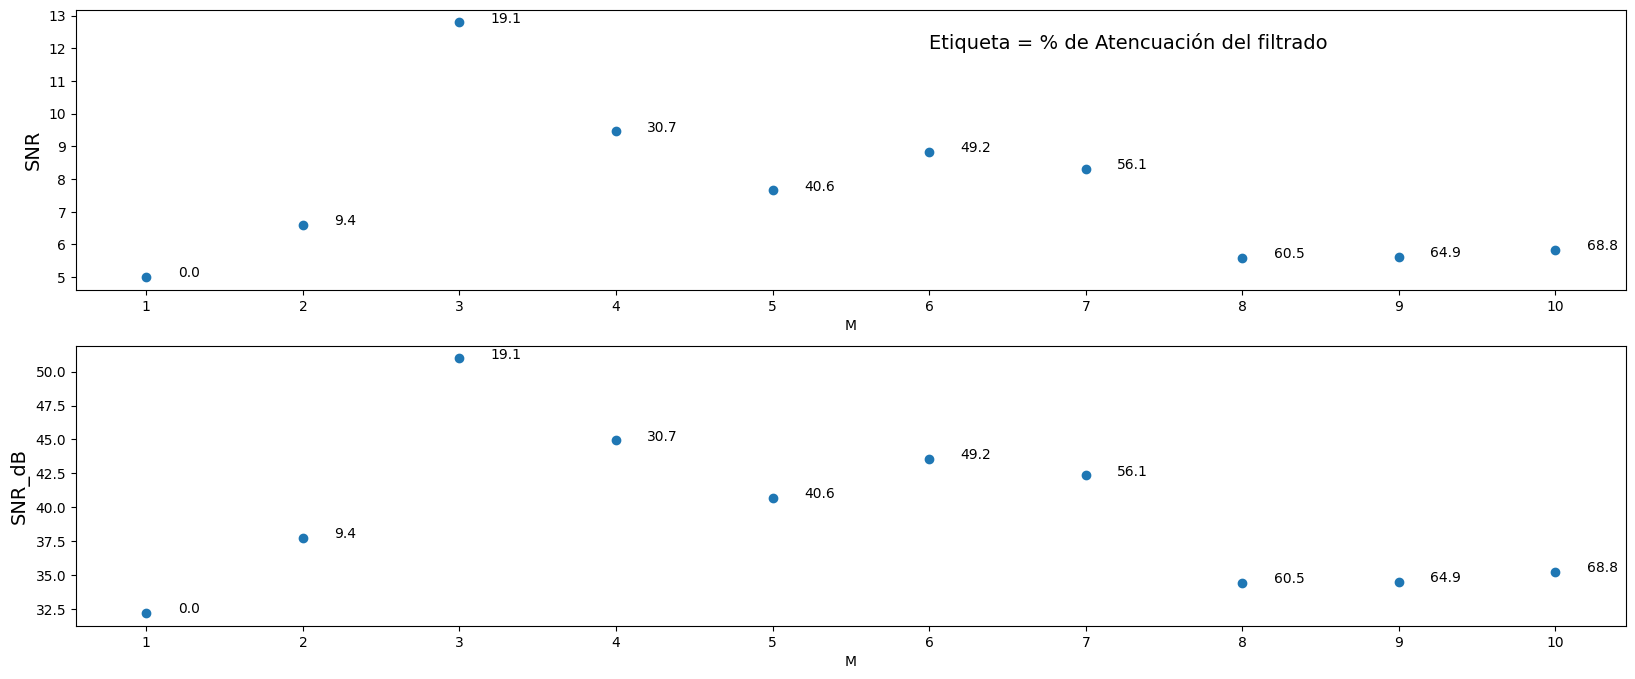

In [15]:
plt.figure (figsize=(20,8))
plt.subplot (2,1,1)
plt.plot (M,SNR,"o")
for i,label in enumerate (Atenuac):
    plt.annotate (label, (M[i] + 0.2, SNR[i]))
plt.ylabel ("SNR",fontsize=14)
plt.xlabel ("M")
plt.xticks(M)
plt.text (6,12,"Etiqueta = % de Atencuación del filtrado",fontsize=14)
plt.subplot (2,1,2)
plt.plot (M,SNR_dB,"o")
for i,label in enumerate (Atenuac):
    plt.annotate (label, (M[i] + 0.2, SNR_dB[i]))
plt.ylabel ("SNR_dB",fontsize=14)
plt.xlabel ("M")
plt.xticks(M)
plt.show()